In [0]:
import numpy as np # linear algebra
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
import operator
from fancyimpute import KNN 
from sklearn.preprocessing import LabelBinarizer
import math
from operator import itemgetter 
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report, r2_score, make_scorer, roc_curve, auc
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, StratifiedKFold, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression


In [0]:
train = pd.read_csv('./hcc_train.csv', error_bad_lines=False)
test = pd.read_csv('./hcc_test.csv', error_bad_lines=False)
balanced_data=pd.read_csv('./hcc-data-complete-balanced.csv', error_bad_lines=False)


#Training and Testing data Information



In [17]:
#Train Data
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
count,110.000000,97.000000,110.000000,100.000000,85.0,96.000000,102.000000,110.000000,82.000000,82.000000,109.000000,104.00000,94.000000,108.000000,109.000000,100.000000,95.000000,72.000000,100.000000,101.000000,109.000000,108.000000,109.000000,110.000000,77.000000,74.000000,110.000000,109.000000,108.000000,107.000000,104.000000,108.000000,108.000000,108.000000,108.000000,107.000000,107.000000,107.000000,108.000000,108.000000,108.000000,103.000000,104.000000,109.000000,98.000000,83.000000,59.000000,57.000000,57.000000,110.000000
mean,0.827273,0.608247,0.754545,0.120000,0.0,0.302083,0.225490,0.918182,0.073171,0.512195,0.394495,0.12500,0.053191,0.416667,0.119266,0.020000,0.031579,0.597222,0.580000,0.732673,0.211009,0.212963,0.733945,66.081818,75.935065,16.236486,0.945455,1.174312,1.416667,1.379701,9151.595577,12.994444,95.072222,1348.522880,110230.351852,3.454299,2.980093,62.158879,87.759259,255.419444,203.150741,9.195146,1.186635,2.844037,6.141837,1.717831,88.567797,39.551579,380.138596,0.654545
std,0.379741,0.490678,0.432326,0.326599,0.0,0.461571,0.419968,0.275342,0.262019,0.502927,0.491000,0.33232,0.225618,0.495305,0.325598,0.140705,0.175804,0.493899,0.496045,0.444772,0.409910,0.411310,0.443934,12.585219,82.396400,21.617031,1.210325,0.448124,0.685293,0.382554,46271.432458,2.141003,7.294946,2746.005384,105714.049411,0.701262,5.511616,54.048397,70.912460,252.682840,168.529775,12.512240,1.102045,1.748938,4.540083,4.288699,56.830806,30.860423,436.996762,0.477693
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.840000,1.200000,7.300000,70.600000,2.200000,51.000000,1.900000,0.300000,13.000000,17.000000,23.000000,1.280000,3.900000,0.200000,1.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.160000,5.350000,11.575000,90.100000,4.900000,198.250000,3.000000,0.900000,29.500000,41.750000,89.750000,106.000000,6.300000,0.710000,1.000000,3.000000,0.300000,41.000000,17.000000,76.900000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,67.000000,75.000000,0.000000,0.000000,1.000000,1.000000,1.300000,37.500000,13.100000,94.950000,6.500000,92000.000000,3.400000,1.400000,43.000000,66.000000,168.000000,150.500000,7.100000,0.875000,2.000000,4.550000,0.700000,87.000000,27.000000,256.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,74.750000,100.000000,30.000000,2.000000,1.000000,2.000000,1.500000,614.250000,14.600000,99.625000,12.100000,161750.000000,4.100000,3.050000,76.500000,107.250000,339.000000,233.500000,7.500000,1.100000,5.000000,8.300000,1.300000,122.500000,56.000000,489.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.000000,500.000000,78.000000,4.000000,3.000000,3.000000,3.560000,421500.000000,18.700000,111.200000,10400.000000,412000.000000,4.900000,40.500000,420.000000,401.000000,1390.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000,1.000000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 50 columns):
0     110 non-null int64
1     97 non-null float64
2     110 non-null int64
3     100 non-null float64
4     85 non-null float64
5     96 non-null float64
6     102 non-null float64
7     110 non-null int64
8     82 non-null float64
9     82 non-null float64
10    109 non-null float64
11    104 non-null float64
12    94 non-null float64
13    108 non-null float64
14    109 non-null float64
15    100 non-null float64
16    95 non-null float64
17    72 non-null float64
18    100 non-null float64
19    101 non-null float64
20    109 non-null float64
21    108 non-null float64
22    109 non-null float64
23    110 non-null int64
24    77 non-null float64
25    74 non-null float64
26    110 non-null int64
27    109 non-null float64
28    108 non-null float64
29    107 non-null float64
30    104 non-null float64
31    108 non-null float64
32    108 non-null float64
33    108 non-null float

In [19]:
#Test Data
test.describe()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
count,55.000000,55.000000,50.00000,55.000000,48.000000,41.000000,45.00000,54.000000,55.000000,44.000000,42.000000,53.000000,51.000000,48.000000,54.000000,54.00000,51.000000,48.000000,41.000000,50.000000,53.000000,53.000000,53.000000,54.000000,55.000000,40.00000,38.000000,55.000000,55.000000,55.000000,54.000000,5.300000e+01,54.000000,54.000000,54.000000,54.000000,52.000000,53.000000,54.000000,54.000000,54.000000,54.000000,51.000000,54.000000,54.000000,47.000000,38.000000,27.000000,28.000000,28.000000
mean,86.509091,0.763636,0.70000,0.709091,0.083333,0.024390,0.20000,0.203704,0.872727,0.090909,0.500000,0.245283,0.137255,0.041667,0.259259,0.12963,0.019608,0.104167,0.634146,0.520000,0.679245,0.245283,0.245283,0.574074,61.909091,61.52500,28.697368,1.163636,1.127273,1.490909,1.505370,3.921371e+04,12.648148,95.214815,1724.838889,119158.624259,3.427500,3.305660,76.870370,113.629630,293.240741,230.333333,8.488235,1.012407,2.518519,8.330213,2.393421,79.111111,31.893571,558.817857
std,45.194589,0.428764,0.46291,0.458368,0.279310,0.156174,0.40452,0.406533,0.336350,0.290803,0.506061,0.434372,0.347540,0.201941,0.442343,0.33905,0.140028,0.308709,0.487652,0.504672,0.471233,0.434372,0.434372,0.499126,14.396852,62.73223,83.364029,1.118260,0.387516,0.690484,0.621164,2.486762e+05,2.155007,10.353295,3223.118341,110635.785063,0.656992,5.520675,63.292387,112.439551,271.123792,166.844521,10.061226,0.570868,1.890799,5.872999,4.051129,53.608505,24.478988,481.453666
min,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.970000,1.800000e+00,5.000000,69.500000,2.600000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,44.000000,5.000000,0.380000,0.000000,1.500000,0.200000,9.000000,1.520000,14.000000
25%,48.500000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.500000,0.00000,0.000000,0.000000,1.000000,1.000000,1.192500,4.900000e+00,11.150000,88.175000,5.425000,346.750000,3.075000,0.800000,31.000000,52.500000,110.500000,117.750000,6.450000,0.700000,1.000000,3.160000,0.500000,38.000000,10.000000,198.500000
50%,82.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,64.000000,72.50000,0.000000,1.000000,1.000000,1.000000,1.285000,2.000000e+01,12.600000,94.500000,9.850000,97500.000000,3.400000,1.300000,58.500000,77.500000,234.000000,171.500000,7.000000,0.810000,1.000000,7.000000,0.925000,72.000000,28.250000,466.500000
75%,127.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,73.000000,100.00000,33.375000,2.000000,1.000000,2.000000,1.630000,6.150000e+02,14.300000,102.750000,2331.200000,178250.000000,3.825000,2.500000,88.000000,113.500000,383.250000,302.750000,7.600000,1.107500,5.000000,13.250000,1.825000,99.000000,41.750000,822.250000
max,163.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,250.00000,510.000000,4.000000,3.000000,3.000000,4.820000,1.810346e+06,15.700000,119.600000,13000.000000,459000.000000,4.800000,32.300000,299.000000,553.000000,1575.000000,974.000000,78.000000,3.230000,5.000000,20.000000,22.100000,187.000000,90.000000,2165.000000


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 50 columns):
id    55 non-null int64
0     55 non-null int64
1     50 non-null float64
2     55 non-null int64
3     48 non-null float64
4     41 non-null float64
5     45 non-null float64
6     54 non-null float64
7     55 non-null int64
8     44 non-null float64
9     42 non-null float64
10    53 non-null float64
11    51 non-null float64
12    48 non-null float64
13    54 non-null float64
14    54 non-null float64
15    51 non-null float64
16    48 non-null float64
17    41 non-null float64
18    50 non-null float64
19    53 non-null float64
20    53 non-null float64
21    53 non-null float64
22    54 non-null float64
23    55 non-null int64
24    40 non-null float64
25    38 non-null float64
26    55 non-null int64
27    55 non-null float64
28    55 non-null float64
29    54 non-null float64
30    53 non-null float64
31    54 non-null float64
32    54 non-null float64
33    54 non-null float64

In [0]:
#Replacing the column integer names with actual names
train.columns=balanced_data.columns
# test.columns=balanced_data.columns

# Columns Distribution into Nominal, Continous and Ordinal


In [0]:

#Nominal Columns
descrete=['Gender','Symptoms','Alcohol','HBsAg','HBeAg','HBcAb','HCVAb','Cirrhosis','Endemic','Smoking','Diabetes','Obesity'
         ,'Hemochro','AHT','CRI','HIV','NASH','Varices','Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark']       
 
#Ordered Columns
ordered=['PS','Encephalopathy','Ascites','Age','Nodule']       

#Continues Columns
contineuos=['Packs_year','AFP','Grams_day','Hemoglobin','MCV','INR','Leucocytes','Platelets','Albumin','Total_Bil','AST','ALP','GGT','ALT','TP','Creatinine'
          ,'Major_Dim','Dir_Bil','Sat','Iron','Ferritin']    


In [0]:
# Removing Id column from the test for preprocessing
id_rows=test['id']
test=test.drop('id',axis=1)
test.columns=train.columns[:-1]

# Null Values Analysis

In [26]:
# Training data
train.isnull().sum(axis=0).sort_values(ascending=False)

Sat               53
Ferritin          53
Iron              51
Varices           38
Packs_year        36
Grams_day         33
Endemic           28
Smoking           28
Dir_Bil           27
HBeAg             25
Hemochro          16
NASH              15
HBcAb             14
Symptoms          13
Major_Dim         12
HIV               10
Spleno            10
HBsAg             10
PHT                9
HCVAb              8
TP                 7
Creatinine         6
Obesity            6
AFP                6
ALT                3
Albumin            3
INR                3
Total_Bil          3
AST                2
GGT                2
Ascites            2
Metastasis         2
ALP                2
Hemoglobin         2
MCV                2
Leucocytes         2
AHT                2
Platelets          2
Nodule             1
PVT                1
Diabetes           1
CRI                1
Hallmark           1
Encephalopathy     1
Alcohol            0
Class              0
Cirrhosis          0
Age          

In [27]:
#Test Data
test.isnull().sum(axis=0).sort_values(ascending=False)

Iron              28
Ferritin          27
Sat               27
Packs_year        17
Dir_Bil           17
Grams_day         15
HBeAg             14
Varices           14
Smoking           13
Endemic           11
HBcAb             10
Major_Dim          8
HBsAg              7
NASH               7
Hemochro           7
Spleno             5
Symptoms           5
Obesity            4
TP                 4
HIV                4
Albumin            3
PVT                2
Metastasis         2
AFP                2
Diabetes           2
Total_Bil          2
PHT                2
CRI                1
AHT                1
HCVAb              1
Creatinine         1
Hallmark           1
MCV                1
ALP                1
GGT                1
AST                1
ALT                1
Platelets          1
Leucocytes         1
Hemoglobin         1
INR                1
Nodule             1
Age                0
Cirrhosis          0
Ascites            0
Encephalopathy     0
PS                 0
Alcohol      

# Analysis of Patients

 Age analysis vs Class 

In [33]:
# Age
print('Oldest patient: ',train['Age'].max())
print('Youngest patient: ',(train['Age'].min()))
print('Average age:',(train['Age'].mean()))
print('Median age:',(train['Age'].median(skipna=True)))

Oldest patient:  93
Youngest patient:  23
Average age: 66.08181818181818
Median age: 67.0


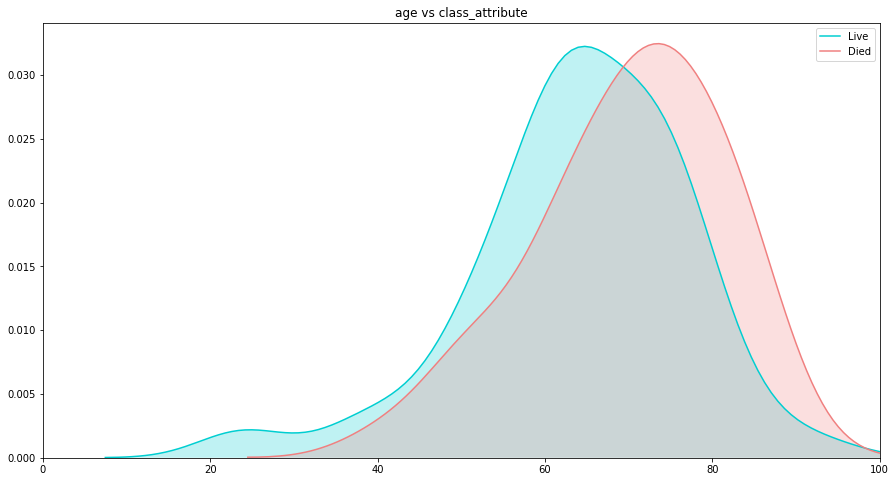

In [37]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    train.Age[train.Class == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    train.Age[train.Class == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('Age vs Class')
plt.xlim(0,100)
plt.show()

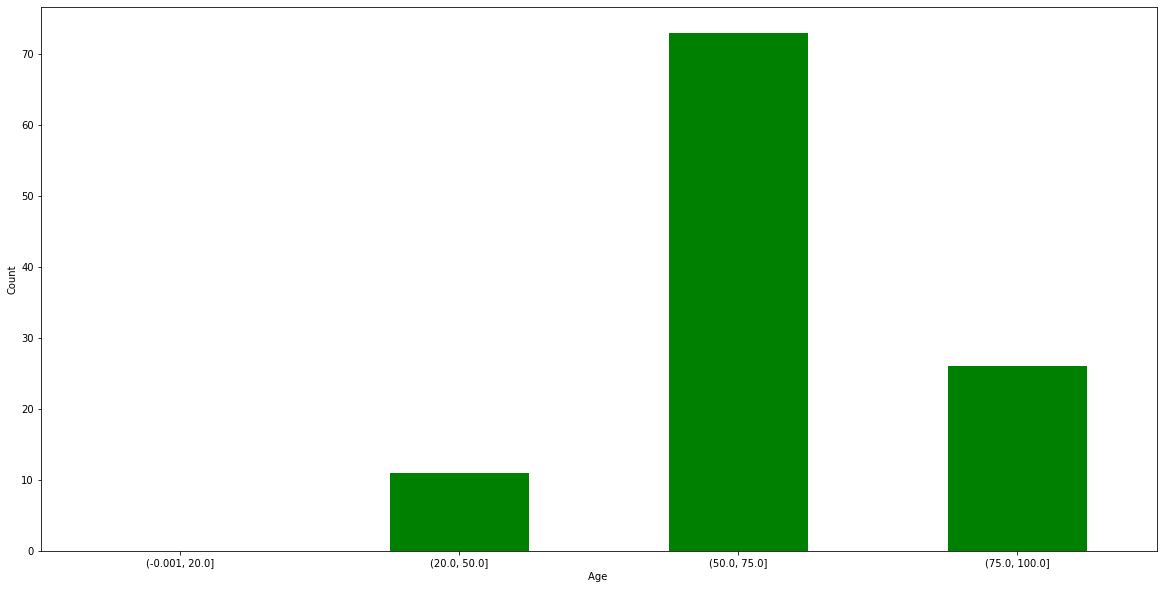

In [38]:
bins = [0, 20, 50, 75, 100]

out = pd.cut(
    train.Age, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color="g", 
    figsize=(20,10)
)

plt.xlabel('Age ')
plt.ylabel('Count')
plt.show()

 Grams_day ANALYSIS VS CLASS

In [43]:
print("No of Null values : ",train['Grams_day'].isnull().sum())
print("Max Value : ",train['Grams_day'].max())
print("Min Value : ",train['Grams_day'].min())
print("Mean Value : ",train['Grams_day'].mean())
print("Median Value : ",train['Grams_day'].median())

No of Null values :  33
Max Value :  500.0
Min Value :  0.0
Mean Value :  75.93506493506493
Median Value :  75.0


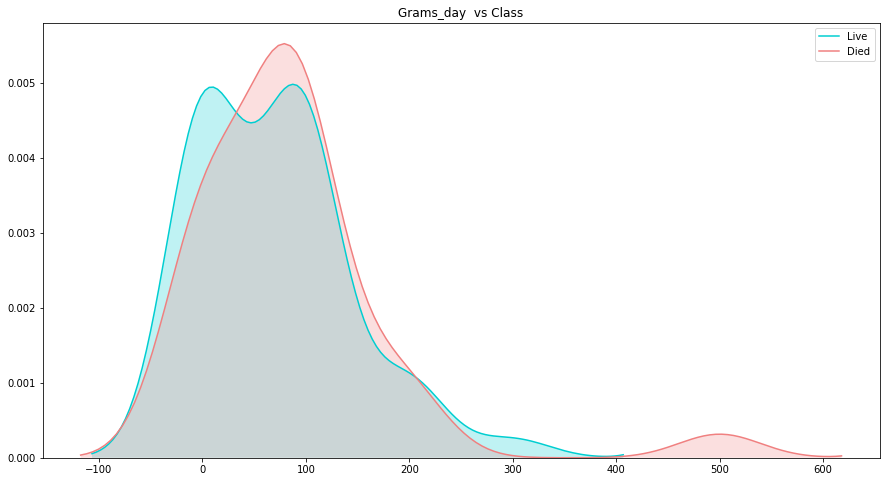

In [44]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    train.Grams_day[train.Class == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    train.Grams_day[train.Class == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('Grams_day  vs Class')
plt.show()

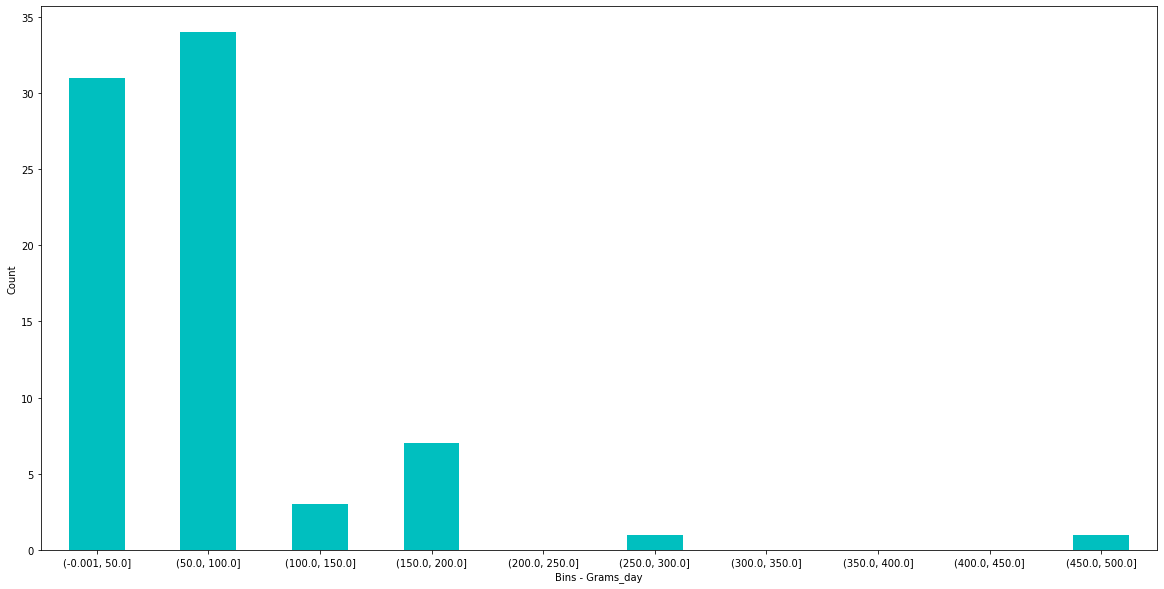

In [46]:
bins = [
    0, 50, 100, 
    150, 200, 250, 
    300, 350, 400,
    450, 500
]

out = pd.cut(
    train.Grams_day, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color='c', 
    figsize=(20,10)
)

plt.xlabel('Bins - Grams_day')
plt.ylabel('Count')
plt.show()

Pack of Cigerates Vs Class 

In [47]:
print("No of Null values : ",train['Packs_year'].isnull().sum())
print("Max Value : ",train['Packs_year'].max())
print("Min Value : ",train['Packs_year'].min())
print("Mean Value : ",train['Packs_year'].mean())
print("Median Value : ",train['Packs_year'].median())

No of Null values :  36
Max Value :  78.0
Min Value :  0.0
Mean Value :  16.236486486486488
Median Value :  0.0


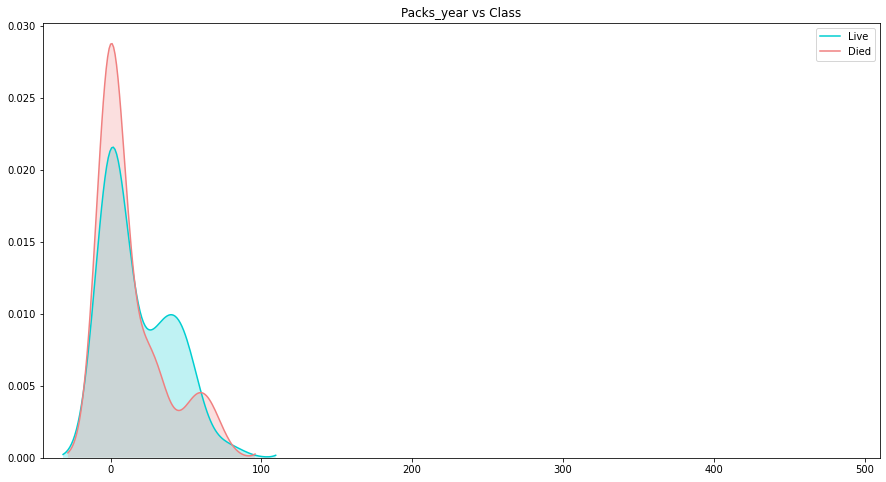

In [50]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    train["Packs_year"][train.Class == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    train["Packs_year"][train.Class == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('Packs_year vs Class')
plt.xlim(-45, 510)
plt.show()

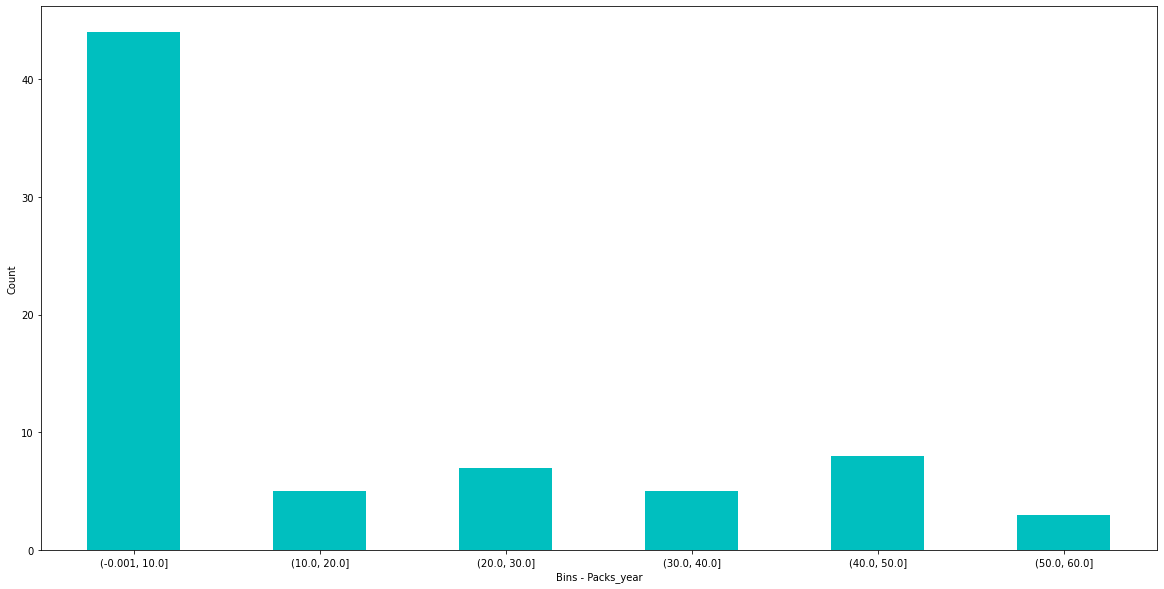

In [55]:
bins = [
    0,10, 20,30,40,50,60
]

out = pd.cut(
    train.Packs_year, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color='c', 
    figsize=(20,10)
)

plt.xlabel('Bins - Packs_year')
plt.ylabel('Count')
plt.show()

# Missing Value Analysis

In [56]:
Missing_data = train.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([ Missing_data, percent_of_missing_data ],  axis=1,  keys=['Total', 'Percent'])
missing.head(15)

,Total,Percent
Sat,53,0.481818
Ferritin,53,0.481818
Iron,51,0.463636
Varices,38,0.345455
Packs_year,36,0.327273
Grams_day,33,0.300000
Endemic,28,0.254545
Smoking,28,0.254545
Dir_Bil,27,0.245455
HBeAg,25,0.227273


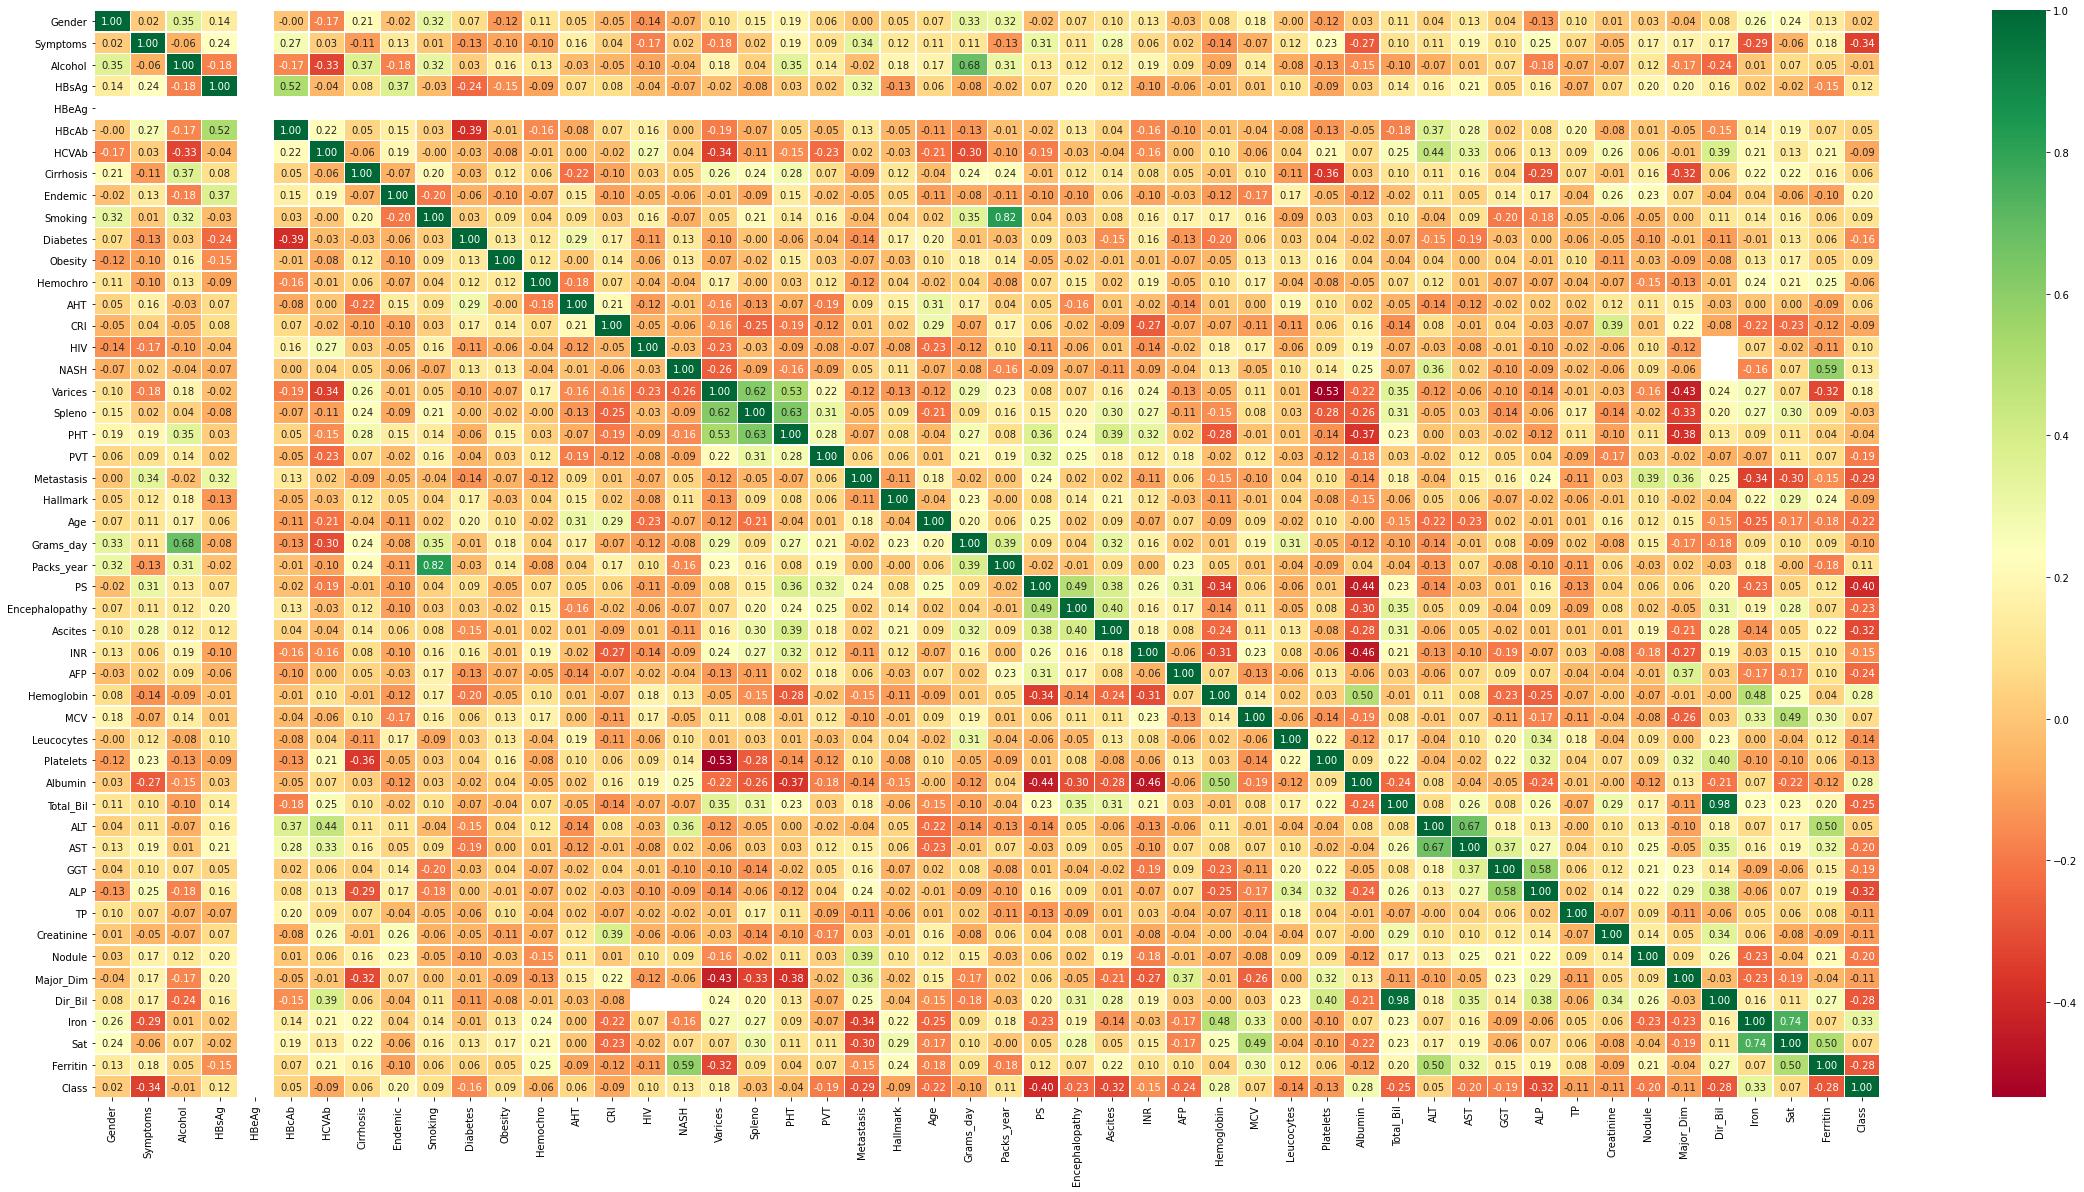

In [57]:
corr = train.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()


# Handling Missing Values

In [58]:
#Replacing the Nan value in descrete columns with the Mode
train[descrete]=train[descrete].apply(lambda y: y.fillna(pd.to_numeric(y.mode()[0],errors='coerce'),axis=0));
test[descrete]=test[descrete].apply(lambda y: y.fillna(pd.to_numeric(y.mode()[0],errors='coerce'),axis=0));

#Replacing the Nan value in Ordered columns with the Mode
train[ordered]=train[ordered].apply(lambda y: y.fillna(pd.to_numeric(y.mode()[0],errors='coerce'),axis=0));
test[ordered]=test[ordered].apply(lambda y: y.fillna(pd.to_numeric(y.mode()[0],errors='coerce'),axis=0));

#Replacing the Nan value in Contineous columns with the K Nearest Neighbours
from fancyimpute import KNN 

continuous_knn_train = KNN(k=3).fit_transform(train[contineuos]);
train[contineuos] = continuous_knn_train

continuous_knn_test = KNN(k=3).fit_transform(test[contineuos]);
test[contineuos] = continuous_knn_test


Imputing row 1/110 with 1 missing, elapsed time: 0.005
Imputing row 101/110 with 1 missing, elapsed time: 0.013
Imputing row 1/55 with 2 missing, elapsed time: 0.002


# Corelation matrix

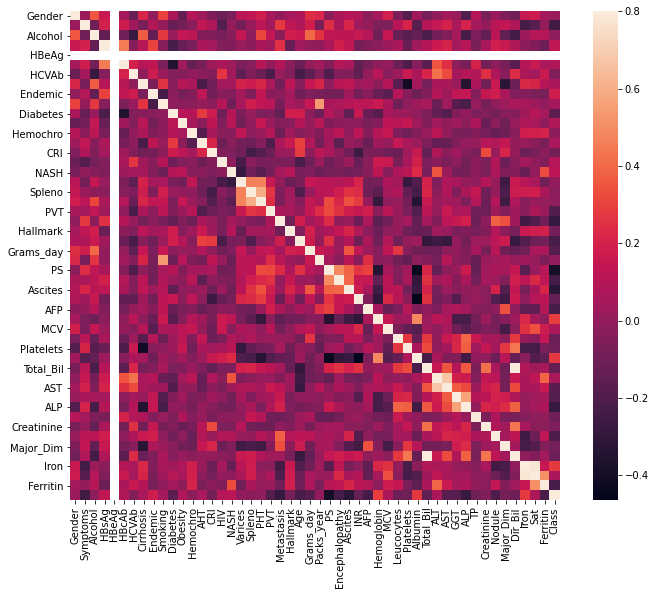

In [59]:
f, ax = plt.subplots(
    figsize=(12, 9)
)

sns.heatmap(
    train.corr(), 
    vmax=.8, 
    square=True
)

In [61]:
train.corr().sort_values(by='Class',ascending=True)

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
PS,-0.020687,0.236866,0.131977,0.064249,NaN,-0.041412,-0.199380,-0.013515,-0.088806,0.059891,0.098123,-0.053547,0.046104,0.053016,0.063321,-0.106789,-0.085072,0.109914,0.119731,0.324842,0.320155,0.227381,0.075663,0.246635,0.104399,0.053948,1.000000,0.493077,0.383350,0.263544,0.291171,-0.343642,0.057798,-0.047708,0.029885,-0.444845,0.211156,-0.130117,-0.019959,0.014551,0.164037,-0.134465,0.040164,0.064823,0.057632,0.145678,-0.175693,0.022988,0.104363,-0.397855
Ascites,0.098326,0.212710,0.126010,0.132905,NaN,0.064997,-0.046449,0.131162,0.032198,0.093732,-0.153593,-0.013212,-0.002925,0.016111,-0.096261,0.018242,-0.101006,0.117548,0.253343,0.344051,0.184297,0.019479,0.208820,0.097712,0.353705,0.109841,0.383350,0.399045,1.000000,0.174258,0.064955,-0.251111,0.109964,0.115042,-0.089984,-0.276533,0.203215,-0.081581,0.024901,-0.020569,0.000498,0.003819,-0.029945,0.206047,-0.191644,0.141637,-0.079171,0.068137,0.211741,-0.322909
Metastasis,-0.001613,0.279509,-0.018417,0.250325,NaN,0.098246,0.010495,-0.091201,-0.025058,-0.076045,-0.137025,-0.049733,-0.112200,0.072336,0.019516,-0.069969,0.051157,0.003229,-0.056053,-0.070363,0.065467,1.000000,-0.098246,0.185791,0.052094,0.103385,0.227381,0.001372,0.019479,-0.115147,0.067733,-0.154609,-0.094334,0.013710,0.056830,-0.138978,0.047296,-0.050099,0.118806,0.152715,0.191313,-0.105019,-0.006033,0.384688,0.333041,0.035793,-0.247545,-0.199697,-0.096481,-0.284638
ALP,-0.194538,0.202214,-0.223260,0.093445,NaN,-0.080098,0.103214,-0.344915,0.142815,-0.218455,-0.003609,-0.018646,-0.077501,0.006948,-0.035436,-0.094098,-0.084605,0.003657,0.069813,-0.060257,0.083258,0.191313,-0.056931,-0.088654,-0.059067,-0.040980,0.164037,0.070931,0.000498,-0.022208,0.051357,-0.230141,-0.173237,0.385876,0.372433,-0.243128,0.357707,0.170110,0.319444,0.567303,1.000000,0.007871,0.208344,0.179004,0.230606,0.375434,0.002914,0.049135,0.074603,-0.277758
Symptoms,0.022069,1.000000,-0.103386,0.192892,NaN,0.174350,0.044448,-0.077361,0.090309,0.007226,-0.123239,-0.089370,-0.025031,0.137862,0.088293,-0.187317,0.004268,-0.087570,0.019318,0.118732,0.044448,0.279509,0.129382,0.082572,0.185854,-0.078207,0.236866,0.067276,0.212710,0.032423,0.009310,-0.062366,-0.061877,0.112639,0.209158,-0.178300,0.103607,0.148325,0.200628,0.060958,0.202214,0.053546,0.005888,0.114551,0.141870,0.084897,-0.234854,-0.172861,0.005919,-0.246345
Encephalopathy,0.069377,0.067276,0.126631,0.192107,NaN,0.092447,-0.048939,0.116040,-0.093369,0.081196,0.024014,-0.015556,0.111615,-0.156992,-0.015556,-0.052899,-0.065090,0.093292,0.179167,0.221712,0.252926,0.001372,0.139726,0.021958,0.028704,-0.035020,0.493077,1.000000,0.399045,0.157481,0.143883,-0.145728,0.113237,-0.057708,0.060625,-0.292891,0.252524,0.036653,0.075204,-0.041810,0.070931,-0.091577,0.048139,0.026803,-0.049067,0.186442,0.125005,0.224697,0.132040,-0.233903
AFP,-0.016172,0.009310,0.093480,-0.053999,NaN,-0.083873,0.003623,0.053059,-0.032494,0.125755,-0.120952,-0.067997,-0.040463,-0.127204,-0.068917,-0.026295,-0.032390,-0.085412,-0.110842,0.018335,0.182403,0.067733,-0.023117,0.071120,0.028051,0.243758,0.291171,0.143883,0.064955,-0.057782,1.000000,0.061981,-0.124816,-0.070864,0.106966,-0.055111,-0.002822,-0.062078,0.056381,0.078981,0.051357,-0.035108,-0.047346,-0.008637,0.337785,-0.010996,-0.150728,-0.144756,0.089499,-0.231327
Age,0.074012,0.082572,0.167283,0.039612,NaN,-0.122488,-0.226411,-0.035116,-0.097432,0.029073,0.189583,0.101010,-0.036262,0.298603,0.283084,-0.218137,-0.076832,-0.065264,-0.202482,-0.038429,0.009133,0.185791,-0.040560,1.000000,0.168595,0.002618,0.246635,0.021958,0.097712,-0.101103,0.071120,-0.094767,0.091870,-0.097180,0.005093,0.025317,-0.292057,

# Scatter Plots

In [69]:
import plotly.express as px

fig = px.scatter_matrix(train.iloc[:,:10],color=train['Class'])
fig.show()

In [70]:
fig = px.scatter_matrix(train.iloc[:,11:20],color=train['Class'])
fig.show()

In [71]:
fig = px.scatter_matrix(train.iloc[:,21:30],color=train['Class'])
fig.show()

In [72]:
fig = px.scatter_matrix(train.iloc[:,31:40],color=train['Class'])
fig.show()

In [73]:
fig = px.scatter_matrix(train.iloc[:,41:48],color=train['Class'])
fig.show()

In [0]:

from sklearn import metrics


# Feature Selection

In [0]:
# Selecting features based on the coreelation values with class attribute with a threadhold of 0.25
col_3=['PS','Ascites','ALP','Metastasis','Dir_Bil','Symptoms','Encephalopathy','AFP','Age','Nodule','AST','PVT','GGT'
    ,'Diabetes','Albumin','Hemoglobin','HBsAg','Endemic']





In [77]:

# Slicing Data based on the feature selection


train_new=train[col_3]
test_new=test[col_3]
x=train[col_3]
x=train_new 
y=train['Class'];

test[col_3]
x_test=test_new

print(x_test.shape)

(55, 18)


# Implementing Logistic Regression for predicting the values

In [92]:
from scipy.optimize import fmin_tnc

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

def cost_function( theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient( theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def fit( x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y))
    return opt_weights[0]


A=np.c_[np.ones((x.shape[0], 1)), x]
# b = y[:, np.newaxis];
b=y
# b=y
theta = np.zeros((x.shape[1]+1, 1))

model_weight = fit(A, b, theta)

x_test_1=np.c_[np.ones((x_test.shape[0], 1)), x_test]
y_pred=probability(model_weight,x_test_1)
y_pred = np.array([1 if (val>0.5) else 0 for val in y_pred])
y_pred      

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [90]:
from sklearn import svm

classifier = svm.SVC(C=0.044,kernel='linear');
classifier.fit(x,y)


SVC(C=0.044, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = classifier.predict(x_test)

y_new = pd.DataFrame(y_pred)   
final = pd.concat([id_rows, y_new], axis=1)
final


final.to_csv("final_C_6", encoding='utf-8', index=False)



# TASK 2

In [96]:

from sklearn.model_selection import train_test_split
from sklearn import metrics

x_new=balanced_data[col_3]
y_new=balanced_data['Class'];

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.3)

#Building an SVM model 
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(x_tr,y_tr)

y_pred = classifier.predict(x_te)


accuracy = metrics.accuracy_score(y_te, y_pred) 
print("Accuracy-",accuracy)


print("RMSE value-",np.sqrt(metrics.mean_squared_error(y_te,y_pred)))

print(y_pred)

Accuracy- 0.7575757575757576
RMSE value- 0.49236596391733095
[0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0]


# Generating Confusion matrix

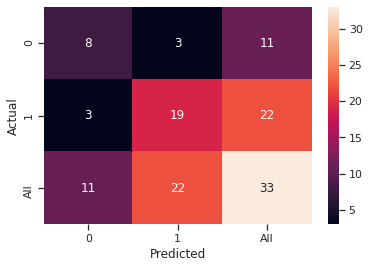

In [95]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_te, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(confusion_matrix, annot=True)
plt.show()

# Computing Precison Recall and F1 score

In [98]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_te, y_pred))
print ('F1 score:', f1_score(y_te, y_pred))
print ('Recall:', recall_score(y_te, y_pred))
print ('Precision:', precision_score(y_te, y_pred))

Accuracy: 0.7575757575757576
F1 score: 0.8260869565217391
Recall: 0.8636363636363636
Precision: 0.7916666666666666


# TASK-3

In [99]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_transform= poly.fit_transform(x)
y_transform=y

x_tr_3, x_te_3, y_tr_3, y_te_3 = train_test_split(X_transform, y_transform, test_size=0.3)

#Building an SVM model 
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(x_tr_3,y_tr_3)

y_pred_3 = classifier.predict(x_te_3)


accuracy = metrics.accuracy_score(y_te_3, y_pred_3) 
print("Accuracy-",accuracy)
print("RMSE value-",np.sqrt(metrics.mean_squared_error(y_te_3,y_pred_3)))

print(y_pred_3)


Accuracy- 0.5454545454545454
RMSE value- 0.674199862463242
[1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1]


In [100]:

print ('Accuracy:', accuracy_score(y_te_3, y_pred_3))
print ('F1 score:', f1_score(y_te_3, y_pred_3))
print ('Recall:', recall_score(y_te_3, y_pred_3))
print ('Precision:', precision_score(y_te_3, y_pred_3))

Accuracy: 0.5454545454545454
F1 score: 0.6341463414634146
Recall: 0.5652173913043478
Precision: 0.7222222222222222


# Plot Validation Curve 

In [0]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(classifier, 
                                             X_transform, 
                                             y_transform, 
                                             param_name='gamma', 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With SVC")
plt.xlabel("Number")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()